In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# A. Análisis Exploratorio de Datos (EDA)

In [216]:
# Cargar dataset original
df_original = pd.read_csv("marketing_raw.csv")

# Crear copia para trabajar (preservar datos originales)
df = df_original.copy()


In [217]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,$58138,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,$46344,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,$71613,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,$26646,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,$58293,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


### - Crear columna ID

El dataset no incluye columna ID pero según el documento de la actividad debería existir un "Identificador único del cliente". Creamos esta columna:

In [218]:
df.insert(0, "ID", range(1, len(df) + 1))

print(f"IDs generados: del 1 al {len(df)}")
print(f"\nPrimeras filas con ID:")
print(df.head())

IDs generados: del 1 al 2205

Primeras filas con ID:
   ID  Income  Kidhome  Teenhome  Recency MntWines MntFruits MntMeatProducts  \
0   1  $58138        0         0       58     $635       $88            $546   
1   2  $46344        1         1       38      $11        $1              $6   
2   3  $71613        0         0       26     $426       $49            $127   
3   4  $26646        1         0       26      $11        $4             $20   
4   5  $58293        1         0       94     $173       $43            $118   

  MntFishProducts MntSweetProducts  ... marital_Together  marital_Widow  \
0            $172              $88  ...                0              0   
1              $2               $1  ...                0              0   
2            $111              $21  ...                1              0   
3             $10               $3  ...                1              0   
4             $46              $27  ...                0              0   

   education_2n

## 1. Explorar la estructura del dataset.

In [219]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,1,$58138,0,0,58,$635,$88,$546,$172,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,2,$46344,1,1,38,$11,$1,$6,$2,$1,...,0,0,0,0,1,0,0,$21,15,0
2,3,$71613,0,0,26,$426,$49,$127,$111,$21,...,1,0,0,0,1,0,0,$734,692,0
3,4,$26646,1,0,26,$11,$4,$20,$10,$3,...,1,0,0,0,1,0,0,$48,43,0
4,5,$58293,1,0,94,$173,$43,$118,$46,$27,...,0,0,0,0,0,0,1,$407,392,0


### - Dimensiones del dataset

In [220]:
df.shape

(2205, 40)

### - Tipos de datos

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2205 non-null   int64 
 1   Income                2205 non-null   object
 2   Kidhome               2205 non-null   int64 
 3   Teenhome              2205 non-null   int64 
 4   Recency               2205 non-null   int64 
 5   MntWines              2205 non-null   object
 6   MntFruits             2205 non-null   object
 7   MntMeatProducts       2205 non-null   object
 8   MntFishProducts       2205 non-null   object
 9   MntSweetProducts      2205 non-null   object
 10  MntGoldProds          2205 non-null   object
 11  NumDealsPurchases     2205 non-null   int64 
 12  NumWebPurchases       2205 non-null   int64 
 13  NumCatalogPurchases   2205 non-null   int64 
 14  NumStorePurchases     2205 non-null   int64 
 15  NumWebVisitsMonth     2205 non-null   

### - Estadísticas descriptivas 

In [222]:
df.describe()

,ID,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,1103.000000,0.442177,0.506576,49.009070,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,...,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,518.707483,0.29932
std,636.672993,0.537132,0.544380,28.932111,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,...,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,553.847248,0.68044
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-283.000000,0.00000
25%,552.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.00000
50%,1103.000000,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,288.000000,0.00000
75%,1654.000000,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,884.000000,0.00000
max,2205.000000,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2458.000000,4.00000


## 2. Identificar outliers evidentes y posibles problemas de calidad

### - Valores nulos

In [223]:
df.isna().sum()

ID                      0
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularPr

In [224]:
print(f"Total de valores nulos: {df.isna().sum().sum()}")

Total de valores nulos: 0


### - Valores duplicados

In [225]:
df.duplicated().sum()

np.int64(0)

In [226]:
print(f"Porcentaje de valores duplicados: {round(df.duplicated().mean()*100,2)} %")

Porcentaje de valores duplicados: 0.0 %


### - Problemas de formato

In [227]:
columnas_formato_incorrecto = []
for elemento in df.columns:
    if df[elemento].dtype == "object":
        columnas_formato_incorrecto.append(elemento)
        
print("Las columnas con formato de texto son: ")
print(columnas_formato_incorrecto)

Las columnas con formato de texto son: 
['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']


### - Análisis de outliers

In [228]:
#verificar presencia de edades de 99999
print("Edades de 99999:", (df['Age'] == 99999).sum())
df["Age"].describe()

Edades de 99999: 0


count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [229]:
# Análisis de outliers para columnas numéricas 
columnas_num = ["Age", "Recency", "Kidhome", "Teenhome",
                      "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", 
                      "NumStorePurchases", "NumWebVisitsMonth", "Customer_Days"]

for col in columnas_num:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        limite_inferior = q1 - (1.5 * iqr)
        limite_superior = q3 + (1.5 * iqr)
        
        atipicos = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        
        if atipicos.shape[0] > 0:
            print(f"Outliers en {col}: {atipicos.shape[0]}")
            print(f"   Rango normal: [{limite_inferior:,.2f}, {limite_superior:,.2f}]")
            print()

Outliers en NumDealsPurchases: 82
   Rango normal: [-2.00, 6.00]

Outliers en NumWebPurchases: 3
   Rango normal: [-4.00, 12.00]

Outliers en NumCatalogPurchases: 20
   Rango normal: [-6.00, 10.00]

Outliers en NumWebVisitsMonth: 8
   Rango normal: [-3.00, 13.00]



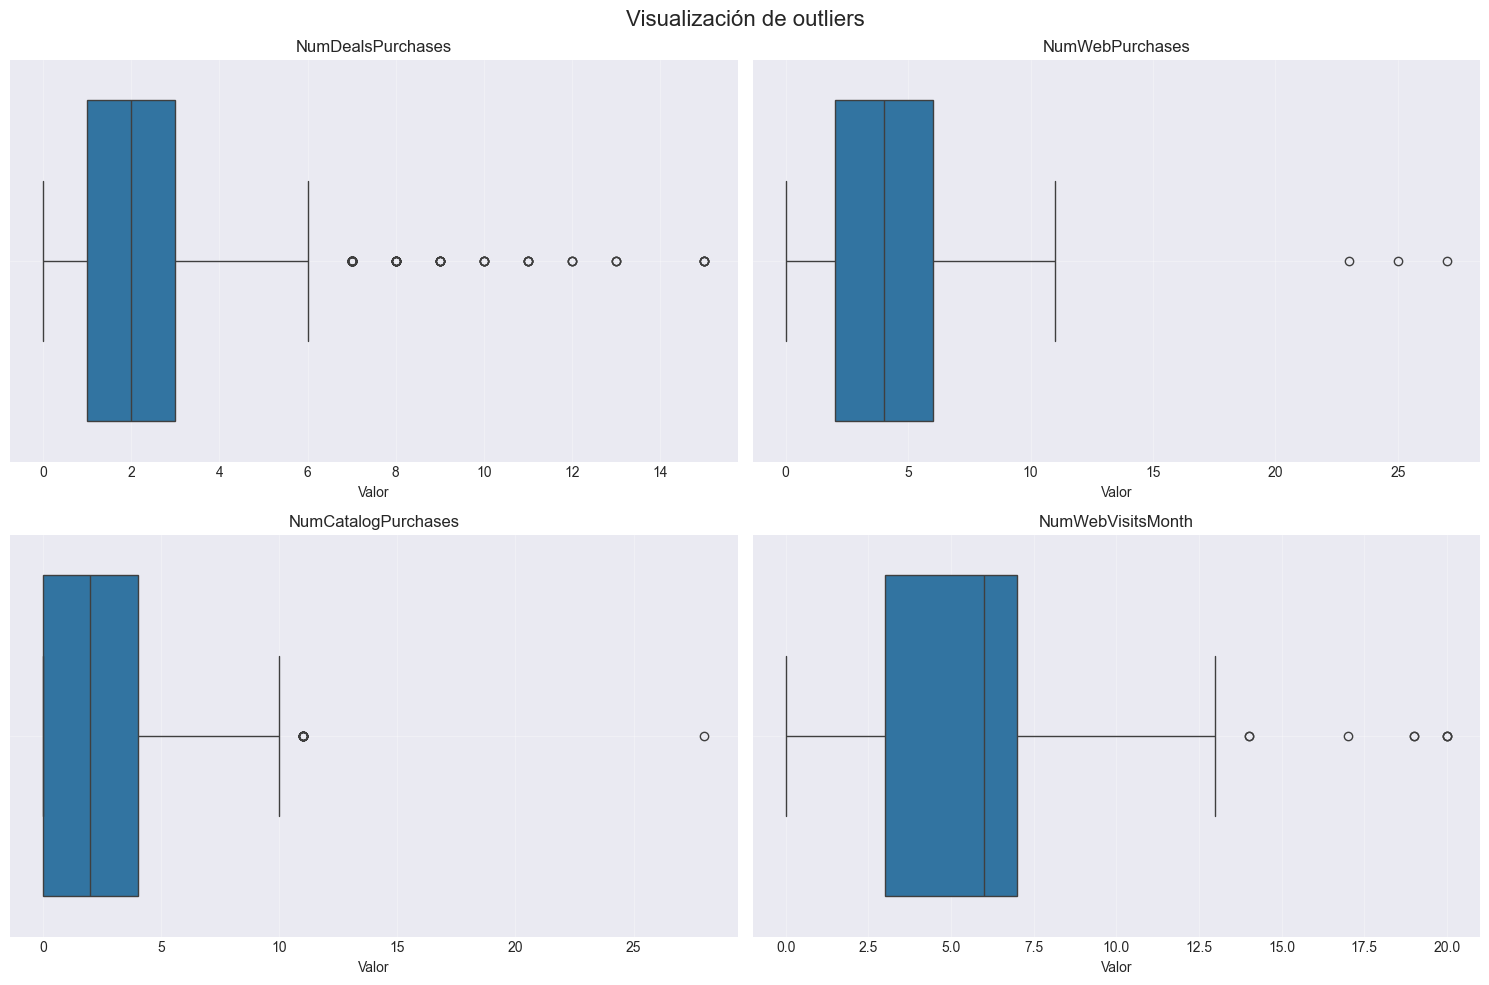

In [230]:
# Visualización de outliers con boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Visualización de outliers", fontsize=16)

variables = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumWebVisitsMonth"]

# Aplanar los ejes para iterar fácilmente
axes_flat = axes.flatten()

# Generar los boxplots
for i, var in enumerate(variables):
    if var in df.columns:
        sns.boxplot(x=df[var], ax=axes_flat[i])
        axes_flat[i].set_title(f"{var}")
        axes_flat[i].set_xlabel("Valor")
        axes_flat[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Observaciones Relevantes del EDA 

**Calidad de los datos:**
1. **Sin valores nulos:** El dataset no contiene valores faltantes
2. **Columna ID creada:** Se agregó columna ID como identificador único ya que no existía en el dataset original
3. **Sin edades inválidas:** No hay registros con Age = 99999

**Problemas de formato:**
- Columnas monetarias en formato texto y requieren conversion

**Outliers Detectados (Método IQR):**

Se analizaron 10 variables numéricas y se detectaron outliers en 4 de ellas:
- **NumDealsPurchases:** outliers detectados
- **NumWebPurchases:** 3 outliers detectados
- **NumCatalogPurchases:** 20 outliers detectados 
- **NumWebVisitsMonth:** 8 outliers detectados 

**Adicionales:**
- Dataset tiene múltiples variables de compra y gastos que pueden ser agrupadas respectivamnete

# B. Preprocesamiento de Datos


### - Conversión de Columnas Monetarias

Las columnas tienen formato "$X,XXX" que debe ser limpiado y luego convertirlas a columnas monetarias.

In [231]:
colum_text = [ "Income","MntWines","MntFruits","MntMeatProducts",
    "MntFishProducts","MntSweetProducts","MntGoldProds","MntTotal"]
for col in colum_text:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("$","", regex=False)
        .str.replace(",","", regex=False)
        .astype(float)
    )

In [232]:
df[colum_text].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2205 non-null   float64
 1   MntWines          2205 non-null   float64
 2   MntFruits         2205 non-null   float64
 3   MntMeatProducts   2205 non-null   float64
 4   MntFishProducts   2205 non-null   float64
 5   MntSweetProducts  2205 non-null   float64
 6   MntGoldProds      2205 non-null   float64
 7   MntTotal          2205 non-null   float64
dtypes: float64(8)
memory usage: 137.9 KB


In [233]:
df[colum_text].head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
0,58138.0,635.0,88.0,546.0,172.0,88.0,88.0,1529.0
1,46344.0,11.0,1.0,6.0,2.0,1.0,6.0,21.0
2,71613.0,426.0,49.0,127.0,111.0,21.0,42.0,734.0
3,26646.0,11.0,4.0,20.0,10.0,3.0,5.0,48.0
4,58293.0,173.0,43.0,118.0,46.0,27.0,15.0,407.0


# C. Reconstrucción de variables categóricas:

## - Crear la columna Marital_Status a partir de marital_*

In [234]:
# Identificar columnas de estado civil
marital_cols = []
for c in df.columns:
    if c.startswith("marital_"):
        marital_cols.append(c)

print(f"Total de columnas marital_* encontradas: {len(marital_cols)}")
print(f"Columnas: {marital_cols}")

Total de columnas marital_* encontradas: 5
Columnas: ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']


In [235]:
# Crear columna Marital_Status y eliminar columnas originales
df["Marital_Status"] = df[marital_cols].idxmax(axis=1).str.replace("marital_", "")
df.drop(columns=marital_cols, inplace=True)

In [236]:
df["Marital_Status"]

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2200     Married
2201    Together
2202    Divorced
2203    Together
2204     Married
Name: Marital_Status, Length: 2205, dtype: object

In [237]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Customer_Days,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_Status
0,1,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,2822,0,0,1,0,0,1529.0,1441,0,Single
1,2,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,2272,0,0,1,0,0,21.0,15,0,Single
2,3,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,2471,0,0,1,0,0,734.0,692,0,Together
3,4,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,2298,0,0,1,0,0,48.0,43,0,Together
4,5,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,2320,0,0,0,0,1,407.0,392,0,Married


## - Crear la columna Education a partir de education_*

In [238]:
# Identificar columnas de educación
edu_cols = []
for c in df.columns:
    if c.startswith("education_"):
        edu_cols.append(c)

print(f"Total de columnas education_* encontradas: {len(edu_cols)}")
print(f"Columnas: {edu_cols}")

Total de columnas education_* encontradas: 5
Columnas: ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']


In [239]:
# Crear columna Education y eliminar columnas originales
df["Education"] = df[edu_cols].idxmax(axis=1).str.replace("education_", "")
df.drop(columns=edu_cols, inplace=True)

In [240]:
df["Education"].head()

0    Graduation
1    Graduation
2    Graduation
3    Graduation
4           PhD
Name: Education, dtype: object

In [241]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_Status,Education
0,1,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,3,11,1,63,2822,1529.0,1441,0,Single,Graduation
1,2,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,3,11,0,66,2272,21.0,15,0,Single,Graduation
2,3,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,3,11,0,55,2471,734.0,692,0,Together,Graduation
3,4,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,3,11,0,36,2298,48.0,43,0,Together,Graduation
4,5,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,3,11,0,39,2320,407.0,392,0,Married,PhD


# D. Validaciones finales:


## - Confirmar los tipos de datos correctos.


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2205 non-null   int64  
 1   Income               2205 non-null   float64
 2   Kidhome              2205 non-null   int64  
 3   Teenhome             2205 non-null   int64  
 4   Recency              2205 non-null   int64  
 5   MntWines             2205 non-null   float64
 6   MntFruits            2205 non-null   float64
 7   MntMeatProducts      2205 non-null   float64
 8   MntFishProducts      2205 non-null   float64
 9   MntSweetProducts     2205 non-null   float64
 10  MntGoldProds         2205 non-null   float64
 11  NumDealsPurchases    2205 non-null   int64  
 12  NumWebPurchases      2205 non-null   int64  
 13  NumCatalogPurchases  2205 non-null   int64  
 14  NumStorePurchases    2205 non-null   int64  
 15  NumWebVisitsMonth    2205 non-null   i

In [243]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital_Status,Education
0,1,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,3,11,1,63,2822,1529.0,1441,0,Single,Graduation
1,2,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,3,11,0,66,2272,21.0,15,0,Single,Graduation
2,3,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,3,11,0,55,2471,734.0,692,0,Together,Graduation
3,4,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,3,11,0,36,2298,48.0,43,0,Together,Graduation
4,5,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,3,11,0,39,2320,407.0,392,0,Married,PhD


In [245]:
df.shape

(2205, 32)

### Exportación de Archivo Limpiado

Guardamos el dataset procesado con todas las transformaciones aplicadas:

In [244]:
df.to_csv("marketing_procesado.csv", index=False)